In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [2]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment


In [3]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/random_Li/'
mapLoc_noise = '../maps2/random_noisy_Li/'
mapLoc_basic = '../maps2/basic_Li/'
mapLoc_small = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49

# Load Maps

In [4]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

In [5]:
subFields = lnn.loadBaseFNames(mapLoc_basic)
basic_base = [mapLoc_basic + s for s in subFields]

In [6]:
subFields = lnn.loadBaseFNames(mapLoc_noise)
noise_base = [mapLoc_noise + s for s in subFields]

In [7]:
subFields = lnn.loadBaseFNames(mapLoc_small)
small_base = [mapLoc_small + s for s in subFields]

In [8]:
def load_lums(base, lumLogBinCents):
    lums = np.zeros([len(base), len(lumLogBinCents)])
    for i, b in enumerate(base):
        lums[i] = lnn.loadData(b + '_lum.npz')['lumFunc']
        
    return(lums)

def get_means_vars(lums):
    means = np.zeros(len(lums[0]))
    std = np.zeros(len(lums[0]))
    
    for i, val in enumerate(lums[0]):
        means[i] = np.mean(lums[:,i])
        std[i] = np.std(lums[:,i])
        
    return(means, std)

def get_logged_means_vars(lums):
    means = np.zeros(len(lums[0]))
    std = np.zeros(len(lums[0]))
    
    for i, val in enumerate(lums[0]):
        means[i] = np.mean(np.log10(lums[:,i]))
        std[i] = np.std(np.log10(lums[:,i]))
        
    return(means, std)

def plot_interval(means, std, lumLogBinCents, ratio=True, log_valued=False):
    if ratio:
        upper = (means+2*std)/means[0]
        lower = (means-2*std)/means[0]
        means = means/means[0]
    else:
        upper = (means+2*std)
        lower = (means-2*std)
        
    if log_valued:
        upper = np.log10(upper)
        for i in range(len(lower)):
            if lower[i] <= 0:
                lower[i] = 1
        lower = np.log10(lower)
        means = np.log10(means)

    plt.figure(figsize=(12, 6))

    plt.semilogx(lumLogBinCents, means, label='Mean')

    plt.fill_between(lumLogBinCents, lower, upper, label='95% Confidence', alpha=0.15)

#     plt.ylim([.8, 1.2])

    plt.xlabel('L (L_sun)')

    plt.legend()
    plt.show()
    
def plot_local_interval(means, std, lumLogBinCents, ratio=True):
    if ratio:
        upper = (means+2*std)/means
        lower = (means-2*std)/means
        means = means/means
    else:
        upper = (means+2*std)
        lower = (means-2*std)

    plt.figure(figsize=(12, 6))

    plt.semilogx(lumLogBinCents, means, label='Mean')

    plt.fill_between(lumLogBinCents, lower, upper, label='95% Confidence', alpha=0.15)

#     plt.ylim([.8, 1.2])
    plt.ylim([-1, 3])

    plt.xlabel('L (L_sun)')

    plt.legend()
    plt.show()

In [9]:
lums = load_lums(base, lumLogBinCents)

In [10]:
noise_lums = load_lums(noise_base, lumLogBinCents)

In [11]:
means, std = get_means_vars(lums)

In [12]:
log_means, log_std = get_logged_means_vars(lums)

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [13]:
noise_means, noise_std = get_means_vars(noise_lums)

In [14]:
basic_lums = load_lums(basic_base, lumLogBinCents)

In [15]:
basic_means, basic_std = get_means_vars(basic_lums)

In [16]:
small_lums = load_lums(small_base, lumLogBinCents)
small_means, small_std = get_means_vars(small_lums)

In [17]:
small_log_means, small_log_std = get_logged_means_vars(small_lums)

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


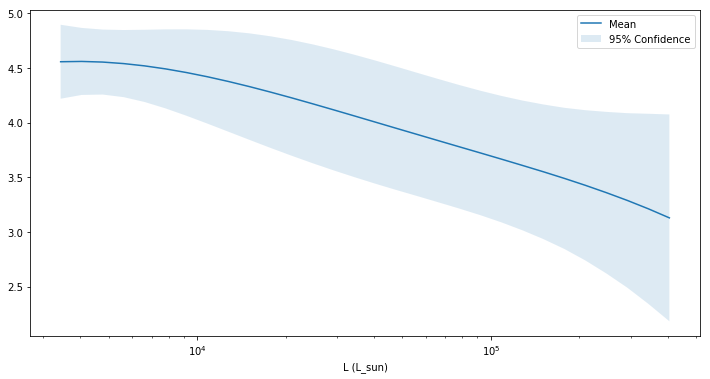

In [18]:
plot_interval(small_log_means, small_log_std, lumLogBinCents, False)

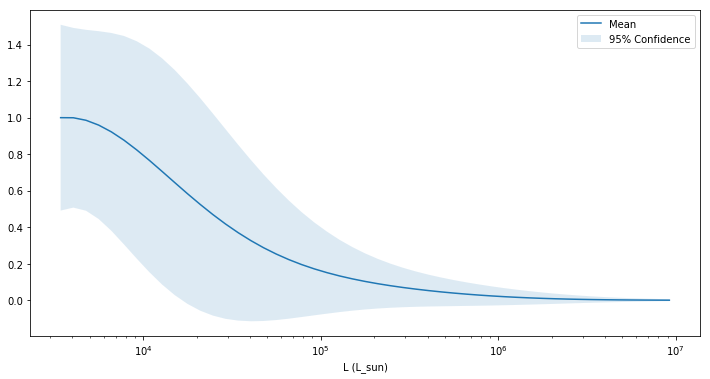

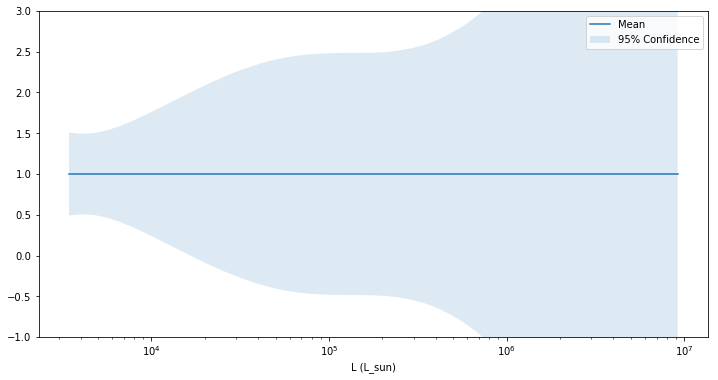

In [19]:
plot_interval(small_means, small_std, lumLogBinCents, True)
plot_local_interval(small_means, small_std, lumLogBinCents, True)

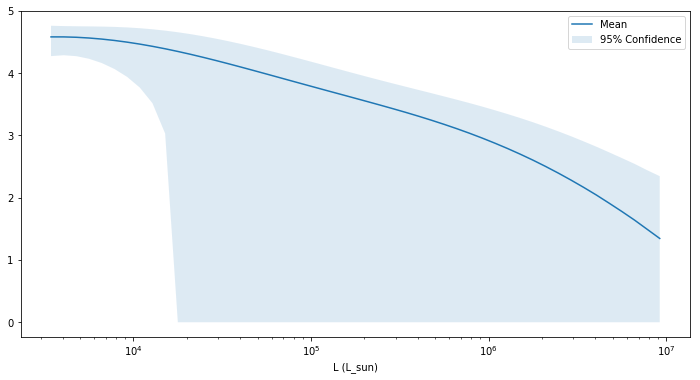

In [20]:
plot_interval(small_means, small_std, lumLogBinCents, False, True)

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


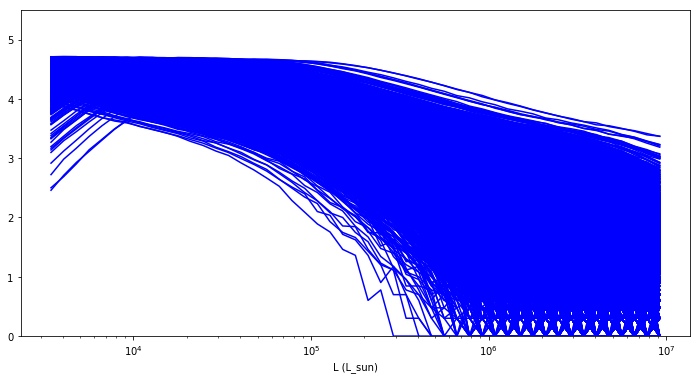

In [35]:
plt.figure(figsize=(12, 6))

for i in range(len(small_lums)):
    plt.semilogx(lumLogBinCents, np.log10(small_lums[i]), color='b')

# plt.ylim([.8, 1.2])
plt.ylim([0, 5.5])

plt.xlabel('L (L_sun)')

plt.legend()
plt.show()

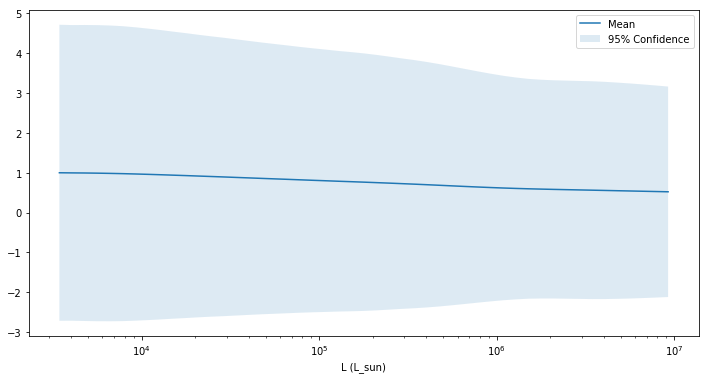

In [11]:
plot_interval(means, std, lumLogBinCents, True)

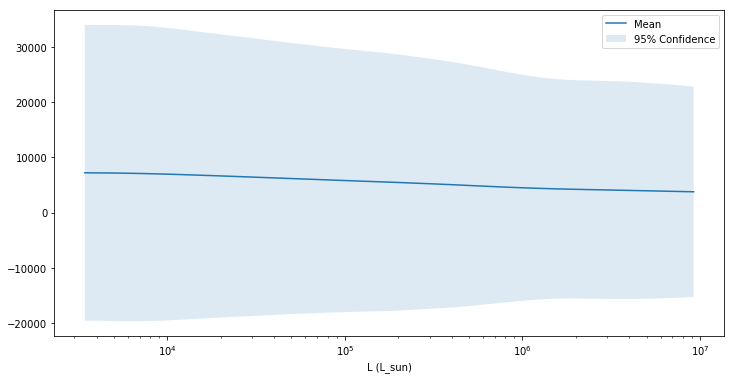

In [23]:
plot_interval(means, std, lumLogBinCents, False)

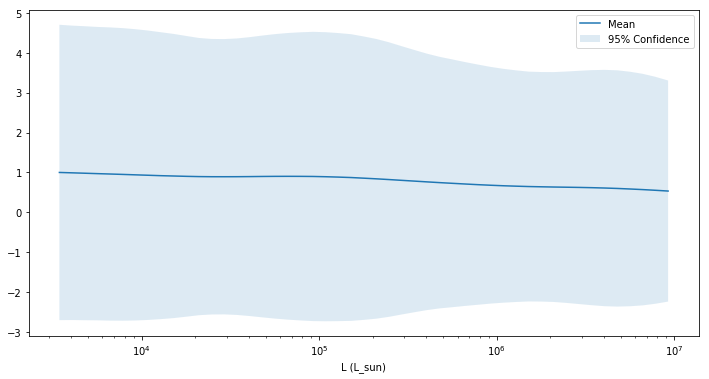

In [12]:
plot_interval(noise_means, noise_std, lumLogBinCents, True)

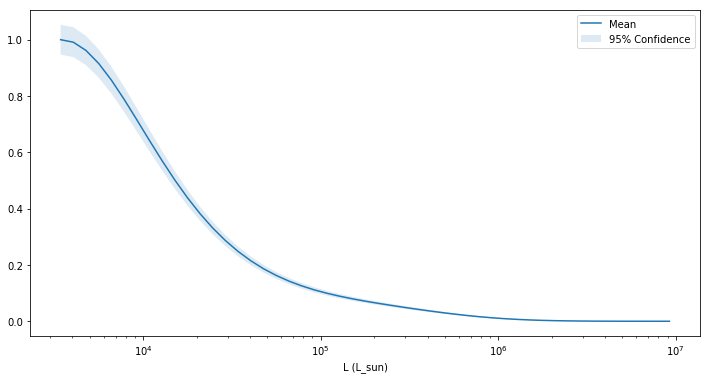

In [13]:
plot_interval(basic_means, basic_std, lumLogBinCents, True)

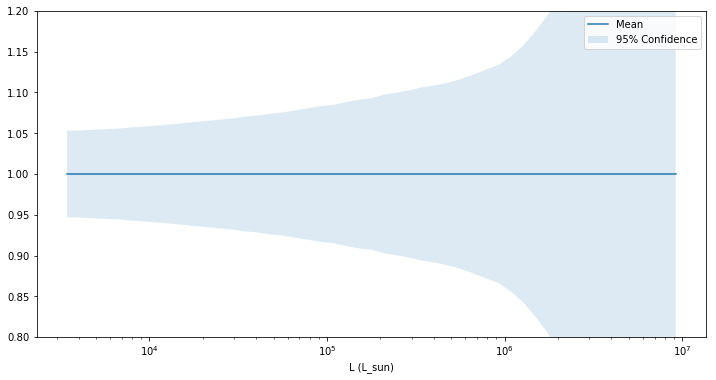

In [17]:
plot_local_interval(basic_means, basic_std, lumLogBinCents, True)

In [20]:
### what model to use and if the maps should use random values or not
model = 'Li'
default = True

### what level of noise to use
noise = 0

### get the subfield names
subFields = lnn.loadSubFields(catLoc)

### number of maps to make
numb_maps = len(subFields)

numb_maps

5796

In [21]:
def make_random_lum_from_cat(catalog, haloLoc, mapLoc, model=None, default=False, noise=0):
    ### make a random paramDict
    paramDict = {}
    paramDict = lnn.make_paramDict(paramDict=paramDict, model=model, default=default)
    
    ### set the parameters for limlam_mocker
    params = lnn.getParams(haloLoc + catalog, mapLoc + catalog, **paramDict)
    
    llm.debug.verbose = False
    
    ### Setup maps to output
    mapinst   = llm.params_to_mapinst(params);
    
    ### Load halos from catalogue
    halos, cosmo = llm.load_peakpatch_catalogue(params.halo_catalogue_file, verbose=llm.debug.verbose)
    halos        = llm.cull_peakpatch_catalogue(halos, params.min_mass, mapinst, verbose=llm.debug.verbose)
    
    ### Calculate Luminosity of each halo
    halos.Lco    = llm.Mhalo_to_Lco(halos, params.model, params.coeffs, verbose=llm.debug.verbose)

    ### generate the luminosity function
    lumInfo = lnn.makeLumFunc(halos)
    
    return(lumInfo)
    

In [22]:
lums = []
lumLogBinCents = make_random_lum_from_cat(subFields[0], catLoc, mapLoc, model, False, noise=noise)[0]
for i in range(1000):
    lums.append(make_random_lum_from_cat(subFields[i], catLoc, mapLoc, model, False, noise=noise)[2])
    
lums = np.array(lums)

In [10]:
lums_default = []
lumLogBinCents = make_random_lum_from_cat(subFields[0], catLoc, mapLoc, model, True, noise=noise)[0]
for i in range(1000):
    lums_default.append(make_random_lum_from_cat(subFields[i], catLoc, mapLoc, model, True, noise=noise)[2])
    
lums_default = np.array(lums)

In [23]:
means_sim, std_sim = get_means_vars(lums)

In [12]:
means_default, std_default = get_means_vars(lums_default)

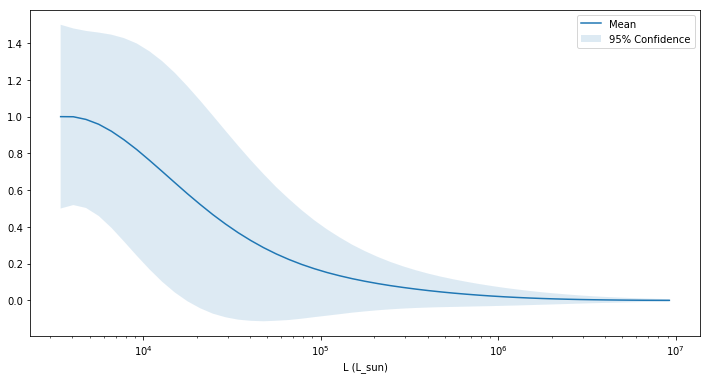

In [24]:
plot_interval(means_sim, std_sim, lumLogBinCents, True)

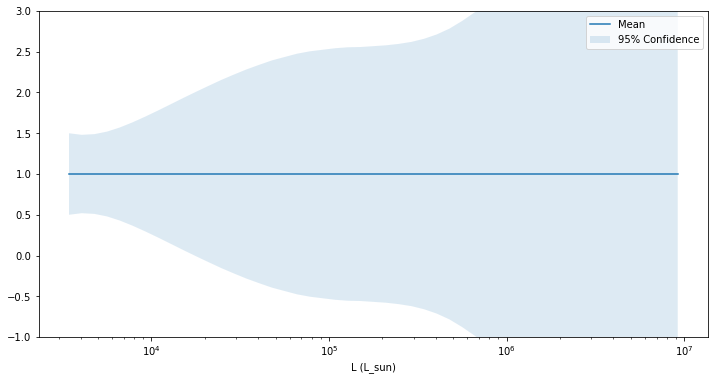

In [31]:
plot_local_interval(means_sim, std_sim, lumLogBinCents, True)

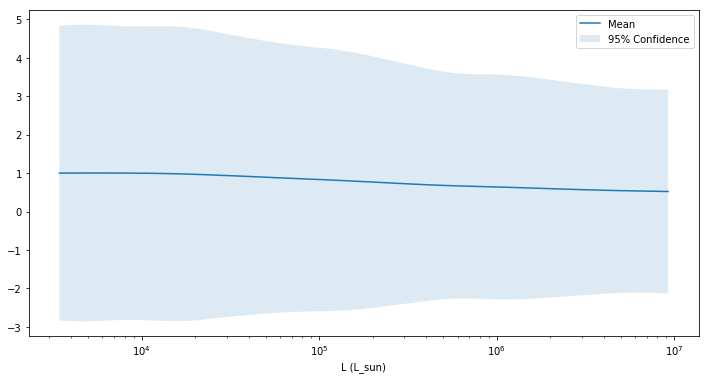

In [13]:
plot_interval(means_default, std_default, lumLogBinCents, True)

In [64]:
lums_noise = []
lumLogBinCents = make_random_lum_from_cat(subFields[i], catLoc, mapLoc, model, True, noise=11)[0]
for i in range(1000):
    lums_noise.append(make_random_lum_from_cat(subFields[i], catLoc, mapLoc, model, True, noise=11)[2])
    
lums_noise = np.array(lums_noise)

In [65]:
means_noise, std_noise = get_means_vars(lums_noise)

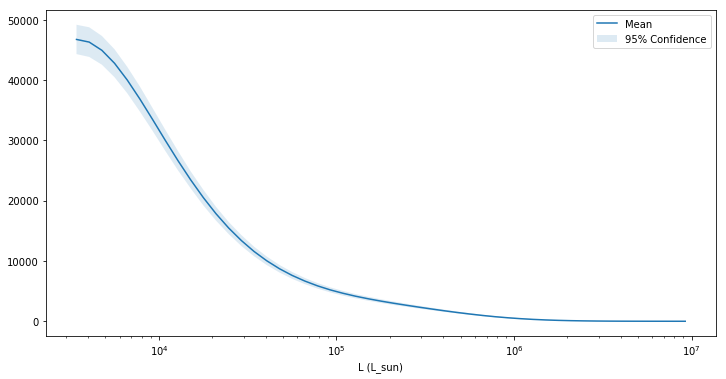

In [69]:
plot_interval(means_noise, std_noise, lumLogBinCents, False)

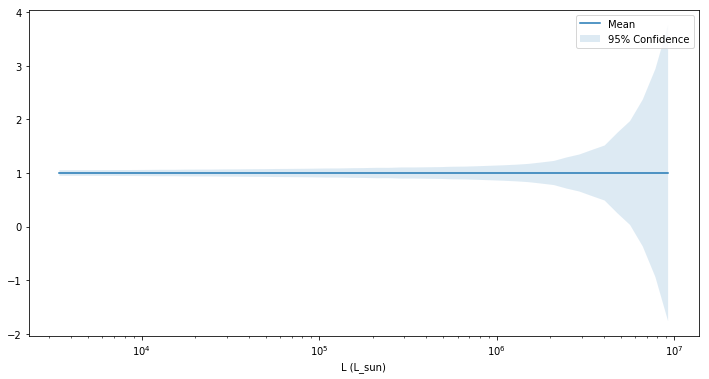

In [74]:
plot_local_interval(means_noise, std_noise, lumLogBinCents, True)

In [17]:
for i in range(10000):
    make_random_lum_from_cat(subFields[i], catLoc, mapLoc, model, False, noise=noise)[2]
    

[ nan  nan  nan ...,  nan  nan  nan] [  3.16227766e+03   3.72759372e+03   4.39397056e+03   5.17947468e+03
   6.10540230e+03   7.19685673e+03   8.48342898e+03   1.00000000e+04
   1.17876863e+04   1.38949549e+04   1.63789371e+04   1.93069773e+04
   2.27584593e+04   2.68269580e+04   3.16227766e+04   3.72759372e+04
   4.39397056e+04   5.17947468e+04   6.10540230e+04   7.19685673e+04
   8.48342898e+04   1.00000000e+05   1.17876863e+05   1.38949549e+05
   1.63789371e+05   1.93069773e+05   2.27584593e+05   2.68269580e+05
   3.16227766e+05   3.72759372e+05   4.39397056e+05   5.17947468e+05
   6.10540230e+05   7.19685673e+05   8.48342898e+05   1.00000000e+06
   1.17876863e+06   1.38949549e+06   1.63789371e+06   1.93069773e+06
   2.27584593e+06   2.68269580e+06   3.16227766e+06   3.72759372e+06
   4.39397056e+06   5.17947468e+06   6.10540230e+06   7.19685673e+06
   8.48342898e+06   1.00000000e+07]


/home/dpfeffe2/projects/intensitymap_cnn/scripts/limlam_mocker/limlam_mocker/halos_to_luminosity.py:65: RuntimeWarning: overflow encountered in power
  Lcop     = lir**alphainv * 10**(-beta * alphainv)
/home/dpfeffe2/projects/intensitymap_cnn/scripts/limlam_mocker/limlam_mocker/halos_to_luminosity.py:65: RuntimeWarning: invalid value encountered in multiply
  Lcop     = lir**alphainv * 10**(-beta * alphainv)
/home/dpfeffe2/projects/intensitymap_cnn/scripts/limlam_mocker/limlam_mocker/halos_to_luminosity.py:157: RuntimeWarning: invalid value encountered in greater
  xscattered  = np.where(data > 0, data*randscaling, data)


NameError: name 'exit' is not defined